## UK house price prediction Exploratory data analysis (EDA)
#### Data Source: HM Land Registry Price Paid Data

_Author **Shereef Bankole**_
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/">Here<a/>
<br/> **Github click**  <a href="https://github.com/SAB-6">Here<a/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data and extract relevant columns

In [2]:
df=pd.read_csv('pp-complete.csv', chunksize=100000, header=None)

In [3]:
chunk_list=[]
for chunk in df:
    chunk_filter=chunk.loc[:,[1,2,4,6,11]]
    chunk_list.append(chunk_filter)
df=pd.concat(chunk_list)

### Set the columns heading

In [4]:
df.columns=[['Price','Date_of_Transfer','Property_Type', 'Duration','City']]

### Preview the data

In [5]:
df.head(5)

,Price,Date_of_Transfer,Property_Type,Duration,City
0,18500,1995-01-31 00:00,F,L,TORQUAY
1,73450,1995-10-09 00:00,D,F,LIVERPOOL
2,59000,1995-03-31 00:00,D,F,POOLE
3,31000,1995-12-04 00:00,D,F,WOODBRIDGE
4,95000,1995-09-22 00:00,D,F,LICHFIELD


In [6]:
df.tail(5)

,Price,Date_of_Transfer,Property_Type,Duration,City
24852944,300000,2019-03-29 00:00,D,F,PWLLHELI
24852945,90000,2019-04-05 00:00,T,F,TREDEGAR
24852946,155000,2019-04-18 00:00,S,F,AMMANFORD
24852947,185000,2019-04-04 00:00,S,F,TREHARRIS
24852948,197000,2019-03-29 00:00,D,F,BRIDGEND


In [7]:
df.shape

(24852949, 5)

For consitency all column headings should be string type

In [8]:
all(isinstance(column, str) for column in df.columns)

False

In [9]:
df.columns = list(map(str, df.columns))

In [10]:
all(isinstance(column, str) for column in df.columns)

True

In [11]:
df.head()

,"('Price',)","('Date_of_Transfer',)","('Property_Type',)","('Duration',)","('City',)"
0,18500,1995-01-31 00:00,F,L,TORQUAY
1,73450,1995-10-09 00:00,D,F,LIVERPOOL
2,59000,1995-03-31 00:00,D,F,POOLE
3,31000,1995-12-04 00:00,D,F,WOODBRIDGE
4,95000,1995-09-22 00:00,D,F,LICHFIELD


The column headings now look messy and in order to be able to use .column notation they require some cleaning up

In [12]:
df.columns=df.columns.str.replace("(","").str.replace("'","").str.replace(",","").str.replace(")","")

In [13]:
df.head()

,Price,Date_of_Transfer,Property_Type,Duration,City
0,18500,1995-01-31 00:00,F,L,TORQUAY
1,73450,1995-10-09 00:00,D,F,LIVERPOOL
2,59000,1995-03-31 00:00,D,F,POOLE
3,31000,1995-12-04 00:00,D,F,WOODBRIDGE
4,95000,1995-09-22 00:00,D,F,LICHFIELD


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [15]:
#Data available per city
df.City.value_counts()

LONDON                    1934459
MANCHESTER                 406682
BRISTOL                    381865
BIRMINGHAM                 366313
NOTTINGHAM                 325115
LEEDS                      279873
LIVERPOOL                  254449
SHEFFIELD                  236161
LEICESTER                  219010
SOUTHAMPTON                203298
NORWICH                    179356
READING                    156294
NEWCASTLE UPON TYNE        154882
STOKE-ON-TRENT             154231
CARDIFF                    153853
NORTHAMPTON                152719
COVENTRY                   143860
DERBY                      142740
BRADFORD                   138546
YORK                       136020
HULL                       132065
SWINDON                    128817
MILTON KEYNES              127430
DONCASTER                  124800
PLYMOUTH                   124602
PRESTON                    123882
PETERBOROUGH               121380
BOURNEMOUTH                115247
COLCHESTER                 113422
BOLTON        

### Brief statistical summary of the data

In [16]:
#This code returns some statistics on numerical variables present in the data
#to include categorical variable use describe(include='all')
df.describe()

,Price
count,2.485295e+07
mean,1.954108e+05
std,7.541374e+05
min,1.000000e+00
25%,7.900000e+04
50%,1.380000e+05
75%,2.250000e+05
max,5.943000e+08


In [17]:
#Summary statistics on only categorical variable
df.describe(include=['O'])

,Date_of_Transfer,Property_Type,Duration,City
count,24852949,24852949,24852949,24852949
unique,9068,5,3,1171
top,2016-03-31 00:00,T,F,LONDON
freq,32355,7542911,18975979,1934459


### Explore Missing values

In [18]:
df.isnull().sum().sort_values(ascending=False).head()

City                0
Duration            0
Property_Type       0
Date_of_Transfer    0
Price               0
dtype: int64

* No  Missing values in anay of the columns

### Identifying outliers using interquartile rule

In [19]:
Stats=df.Price.describe()
INTQ=Stats["75%"]-Stats["25%"]
UPPER_Q=Stats["75%"]+1.5*INTQ
LOWER_Q=Stats["75%"]-1.5*INTQ
print("The upper quartile of the house price is: ", UPPER_Q)
print("The lower quartile of the house price is: ", LOWER_Q)

The upper quartile of the house price is:  444000.0
The lower quartile of the house price is:  6000.0


In [20]:
Outlier_L=df.Price[df.Price < 5250]
print('Lower band outliers: \n', Outlier_L.describe())

Lower band outliers: 
 count    19139.000000
mean      2591.645959
std       1706.613916
min          1.000000
25%       1000.000000
50%       2500.000000
75%       4250.000000
max       5245.000000
Name: Price, dtype: float64


In [21]:
Outlier_U=df[['Price','Date_of_Transfer','City']][df.Price >444750]
#print('Lower band outliers: \n', Outlier_L.describe())
Outlier_U.head(30)

,Price,Date_of_Transfer,City
643,480000,1995-12-15 00:00,LONDON
911,693000,1995-06-29 00:00,LONDON
1392,495000,1995-05-10 00:00,DAVENTRY
1496,665000,1995-08-06 00:00,SLEAFORD
1553,692500,1995-02-09 00:00,WELWYN
2235,650000,1995-11-17 00:00,LONDON
2360,560000,1995-12-07 00:00,MALMESBURY
2407,802500,1995-10-23 00:00,CHALFONT ST. GILES
2501,780000,1995-01-31 00:00,LONDON
2805,1391000,1995-05-05 00:00,WINDLESHAM


In [22]:
dataset=df[:]

In [23]:
dataset.Price.max()

594300000

In [24]:
dataset[dataset.Price==594300000]

,Price,Date_of_Transfer,Property_Type,Duration,City
23069103,594300000,2017-07-31 00:00,O,L,LONDON


### Remove lower band outliers

It is unlikely house price will be less than £5250 hence, the reason for removing the lower outliers while

In [25]:
dataset=df.iloc[:,0:][df.Price > 5250]
dataset.shape

(24833687, 5)

In [26]:
dataset[dataset.Price ==5263]

,Price,Date_of_Transfer,Property_Type,Duration,City
102027,5263,1995-11-22 00:00,T,F,LEEDS
560749,5263,1995-11-22 00:00,T,F,LEEDS
584881,5263,1995-11-22 00:00,T,F,LEEDS


#### It seem there are many outliers in the dataset. The minimum house price (£5263) was in Leeds in 1995
#### However, a quick review of https://www.home.co.uk/guides/house_prices_report.htm?location=leeds&all=1 shows that in the year 1995, the cheapest flat was sold at £35,737. Also the maximum house price in the dataset is located in London priced at £594.3 million in the year 2017. This seems to be  an extreme as the most expensive house sold in London in recent years is priced at £160 million (see https://www.foxtons.co.uk/discover/2018/01/where-are-londons-most-expensive-homes.html). Hence, I decided confine the dataset to house price between £35,000 and £160 million.

In [27]:
dataset=dataset[(dataset.Price < 160000000) & (dataset.Price > 35000)]
Min_Price=dataset.Price.min()
Max_Price=dataset.Price.max()
print("The minimum house price is: £{}, while the maximum house price is: £{}." .format(Min_Price,Max_Price))

The minimum house price is: £35001, while the maximum house price is: £159748732.


In [28]:
def visualise_features(data,columnID):
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    data[columnID].value_counts().plot()
    plt.xlabel(columnID)
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    
    plt.subplot(122)
    if data[columnID].dtypes == 'int64' or columnID =='Date_of_Transfer':
    #plot the mean salary for each category and fill between the (mean - std, mean + std)
        group_mean = df.groupby(columnID)['Price'].mean()
        std = df.groupby(columnID)['Price'].std()
        group_mean.plot()
        plt.fill_between(range(len(std.index)), group_mean.values-std.values, group_mean.values + std.values, alpha = 0.3)
    
    else:
        sns.boxplot(x=columnID, y='Price', data=data)
    plt.xlabel(columnID)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
        

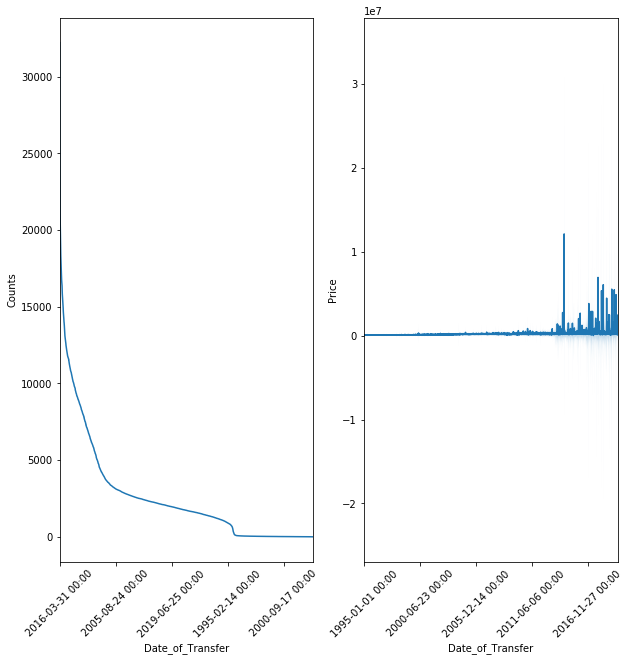

In [29]:
visualise_features(dataset,'Date_of_Transfer')

#### There is no correlation between the house price and date of transfer

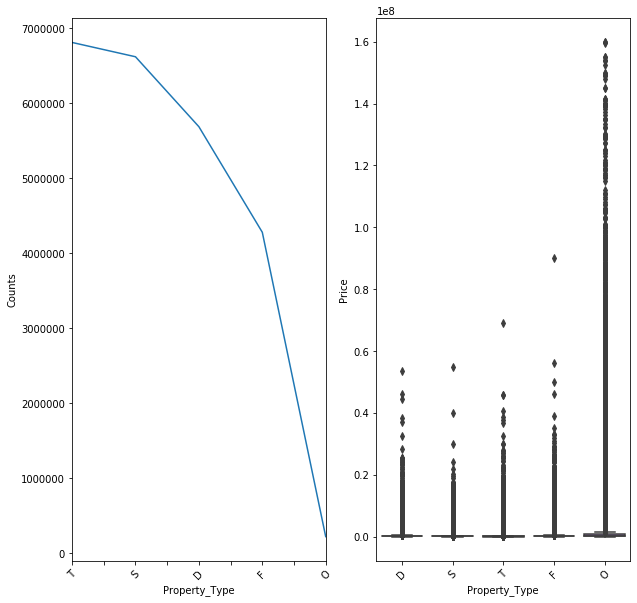

In [30]:
visualise_features(dataset,'Property_Type')

Key:
<br/> S=Semi-Detached D=Detached F= Flats/Maisonettes T= Terraced O= Other 

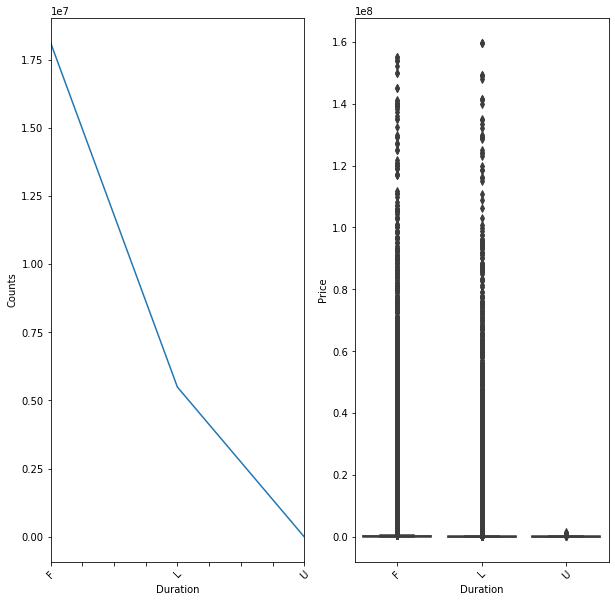

In [31]:
visualise_features(dataset,'Duration')

Key:
<br/>  F = Freehold, L= Leasehold etc.

#### Restrict the City to London or others for better handling 

In [32]:
dataset.iloc[:,4][dataset.iloc[:,4]!='LONDON']='OTHERS'
dataset.City.value_counts()

C:\Users\sb222\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


OTHERS    21707639
LONDON     1910653
Name: City, dtype: int64

In [33]:
dataset.head()

,Price,Date_of_Transfer,Property_Type,Duration,City
1,73450,1995-10-09 00:00,D,F,OTHERS
2,59000,1995-03-31 00:00,D,F,OTHERS
4,95000,1995-09-22 00:00,D,F,OTHERS
5,45450,1995-02-28 00:00,S,F,OTHERS
6,96000,1995-10-27 00:00,S,F,OTHERS


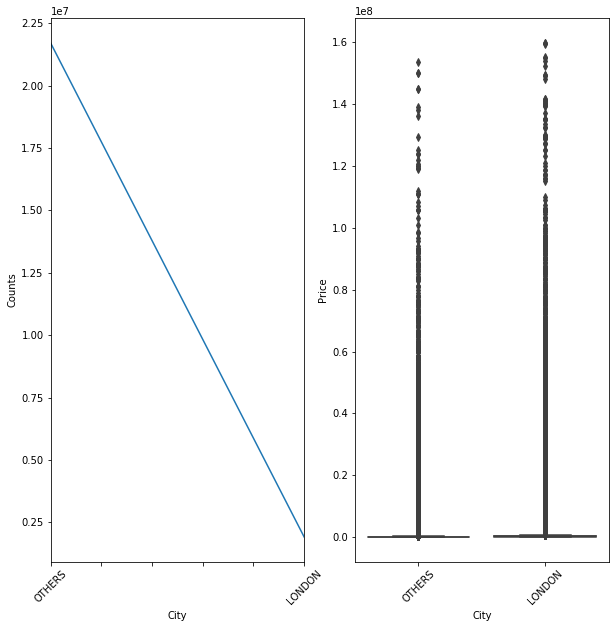

In [34]:
visualise_features(dataset,'City')

#### OnehotEncoding of Categorical variables using get_dummies method

In [35]:
def get_dummie(data,cat_feat=None):
    dummie_variable=pd.get_dummies(data[cat_feat])
    df=data.drop(cat_feat+['Date_of_Transfer'], axis=1,)
    return pd.concat([df,dummie_variable],axis=1)

In [36]:
features=['Property_Type','Duration','City']
dataset_trsfm=get_dummie(dataset,cat_feat=features)
dataset_trsfm.head()

,Price,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T,Duration_F,Duration_L,Duration_U,City_LONDON,City_OTHERS
1,73450,1,0,0,0,0,1,0,0,0,1
2,59000,1,0,0,0,0,1,0,0,0,1
4,95000,1,0,0,0,0,1,0,0,0,1
5,45450,0,0,0,1,0,1,0,0,0,1
6,96000,0,0,0,1,0,1,0,0,0,1


### Heat map that shows correlation between the features

In [37]:
def Heat_map(data, features):
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[features].corr(), cmap='RdBu', annot=True)
    plt.xticks(rotation=45)                     

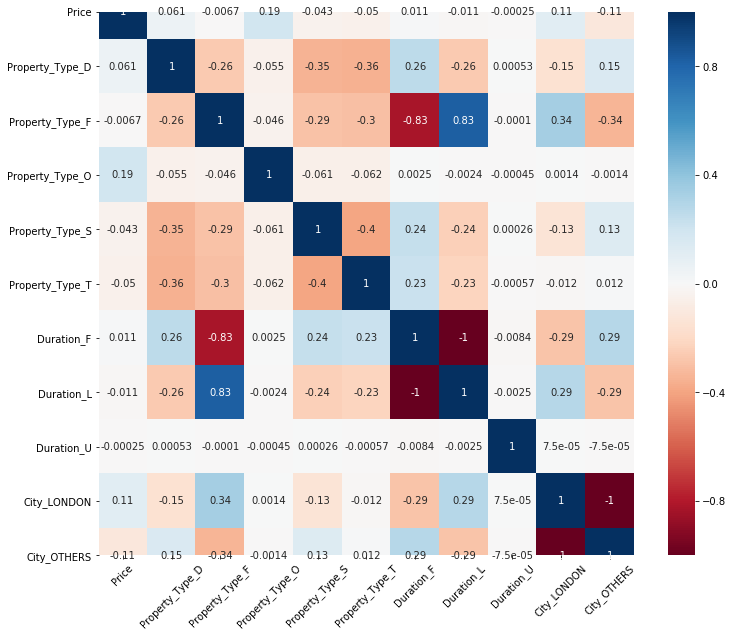

In [38]:
Heat_map(dataset_trsfm,list(dataset_trsfm.columns))

#### It is glaring from the heat map that property type others has the strongest correlation with house price. The date of transfer has been removed as previous plots show it has no relevance to housing price.

In [39]:
dataset_trsfm.head()

,Price,Property_Type_D,Property_Type_F,Property_Type_O,Property_Type_S,Property_Type_T,Duration_F,Duration_L,Duration_U,City_LONDON,City_OTHERS
1,73450,1,0,0,0,0,1,0,0,0,1
2,59000,1,0,0,0,0,1,0,0,0,1
4,95000,1,0,0,0,0,1,0,0,0,1
5,45450,0,0,0,1,0,1,0,0,0,1
6,96000,0,0,0,1,0,1,0,0,0,1


#### Splitting the data into train and test sets

In [40]:
from sklearn.model_selection import train_test_split
predictors= dataset_trsfm.iloc[:,2:]
target=dataset_trsfm.iloc[:,0]
predictors_train,predictors_test,target_train,target_test=train_test_split(predictors,target,test_size=0.3, random_state=42)
print('The number of training set is: {}. \nThe number of test set is: {}' .format(predictors_train.shape[0],predictors_test.shape[0]) )

The number of training set is: 16532804. 
The number of test set is: 7085488
